In [1]:
import json
import configparser
import pandas as pd
import sqlite3
import pandas_redshift as pr

# Project US Fire Analytics: Overview

In the recent years, fires have been raging in the United States, especially in California. In this project I explore fires in the US and hope to provide information on how many people were affected by those fires.
I found an interesting data set, providing specifics on fires in the United States from 1992 to 2015. This data can be combined with demographic data from the United States Census Bureau, to provide an estimate on how many people (based on county population) were affected by fires.

# Datasets

## US fire data
Short, Karen C. 2017. Spatial wildfire occurrence data for the United States, 1992-2015 [FPAFOD20170508]. 4th Edition. Fort Collins, CO: Forest Service Research Data Archive. https://doi.org/10.2737/RDS-2013-0009.4

Check here for more details: https://www.kaggle.com/rtatman/188-million-us-wildfires

Format: SQLite database

Direct link to data: https://www.kaggle.com/rtatman/188-million-us-wildfires/download

## Demographic county data
Annual County Resident Population Estimates by Age, Sex, Race, and Hispanic Origin: April 1, 2010 to July 1, 2019. https://www.census.gov/data/datasets/time-series/demo/popest/2010s-counties-detail.html

Format: CSV-File

Direct link to data: https://www2.census.gov/programs-surveys/popest/datasets/2010-2019/counties/asrh/cc-est2019-alldata.csv

## State abbreviations to names data
Mapping to facilitate connecting the data sets: https://github.com/jasonong/List-of-US-States

Format: CSV-File

Direct link to data: https://github.com/jasonong/List-of-US-States/blob/master/states.csv

# Exploring the downloaded data
## US fire data

In [2]:
%%time
df_fires = pd.read_sql_query("SELECT * FROM Fires", sqlite3.connect('FPA_FOD_20170508.sqlite'))

CPU times: user 31.6 s, sys: 3.62 s, total: 35.2 s
Wall time: 37 s


In [3]:
df_fires.shape

(1880465, 39)

In [4]:
print('Columns')
[col for col in df_fires.columns]

Columns


['OBJECTID',
 'FOD_ID',
 'FPA_ID',
 'SOURCE_SYSTEM_TYPE',
 'SOURCE_SYSTEM',
 'NWCG_REPORTING_AGENCY',
 'NWCG_REPORTING_UNIT_ID',
 'NWCG_REPORTING_UNIT_NAME',
 'SOURCE_REPORTING_UNIT',
 'SOURCE_REPORTING_UNIT_NAME',
 'LOCAL_FIRE_REPORT_ID',
 'LOCAL_INCIDENT_ID',
 'FIRE_CODE',
 'FIRE_NAME',
 'ICS_209_INCIDENT_NUMBER',
 'ICS_209_NAME',
 'MTBS_ID',
 'MTBS_FIRE_NAME',
 'COMPLEX_NAME',
 'FIRE_YEAR',
 'DISCOVERY_DATE',
 'DISCOVERY_DOY',
 'DISCOVERY_TIME',
 'STAT_CAUSE_CODE',
 'STAT_CAUSE_DESCR',
 'CONT_DATE',
 'CONT_DOY',
 'CONT_TIME',
 'FIRE_SIZE',
 'FIRE_SIZE_CLASS',
 'LATITUDE',
 'LONGITUDE',
 'OWNER_CODE',
 'OWNER_DESCR',
 'STATE',
 'COUNTY',
 'FIPS_CODE',
 'FIPS_NAME',
 'Shape']

In [5]:
df_fires.head(2)

,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,...,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
0,1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,0511,Plumas National Forest,...,A,40.036944,-121.005833,5.0,USFS,CA,63,063,Plumas,b'\x00\x01\xad\x10\x00\x00\xe8d\xc2\x92_@^\xc0...
1,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.933056,-120.404444,5.0,USFS,CA,61,061,Placer,b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\x19^\...


In [6]:
print('Checking for missing data')
df_fires.isna().sum()

Checking for missing data


OBJECTID                            0
FOD_ID                              0
FPA_ID                              0
SOURCE_SYSTEM_TYPE                  0
SOURCE_SYSTEM                       0
NWCG_REPORTING_AGENCY               0
NWCG_REPORTING_UNIT_ID              0
NWCG_REPORTING_UNIT_NAME            0
SOURCE_REPORTING_UNIT               0
SOURCE_REPORTING_UNIT_NAME          0
LOCAL_FIRE_REPORT_ID          1459286
LOCAL_INCIDENT_ID              820821
FIRE_CODE                     1555636
FIRE_NAME                      957189
ICS_209_INCIDENT_NUMBER       1854748
ICS_209_NAME                  1854748
MTBS_ID                       1869462
MTBS_FIRE_NAME                1869462
COMPLEX_NAME                  1875282
FIRE_YEAR                           0
DISCOVERY_DATE                      0
DISCOVERY_DOY                       0
DISCOVERY_TIME                 882638
STAT_CAUSE_CODE                     0
STAT_CAUSE_DESCR                    0
CONT_DATE                      891531
CONT_DOY    

In [7]:
df_fires['FIRE_YEAR'].min(), df_fires['FIRE_YEAR'].max()

(1992, 2015)

<AxesSubplot:>

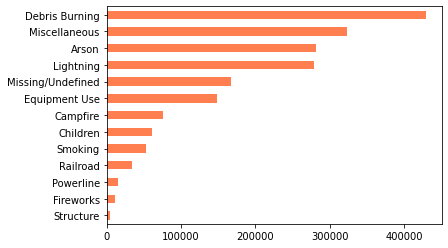

In [8]:
df_fires['STAT_CAUSE_DESCR'].value_counts(ascending=True).plot(kind='barh', color='coral')

In [9]:
df_fires['STATE'].value_counts(normalize=False)[0:9]

CA    189550
GA    168867
TX    142021
NC    111277
FL     90261
SC     81315
NY     80870
MS     79230
AZ     71586
Name: STATE, dtype: int64

## County demographics data

In [10]:
df_c = pd.read_csv('cc-est2019-alldata.csv', encoding='latin-1')

In [11]:
df_c.head(5)

,SUMLEV,STATE,COUNTY,STNAME,CTYNAME,YEAR,AGEGRP,TOT_POP,TOT_MALE,TOT_FEMALE,...,HWAC_MALE,HWAC_FEMALE,HBAC_MALE,HBAC_FEMALE,HIAC_MALE,HIAC_FEMALE,HAAC_MALE,HAAC_FEMALE,HNAC_MALE,HNAC_FEMALE
0,50,1,1,Alabama,Autauga County,1,0,54571,26569,28002,...,607,538,57,48,26,32,9,11,19,10
1,50,1,1,Alabama,Autauga County,1,1,3579,1866,1713,...,77,56,9,5,4,1,0,0,2,1
2,50,1,1,Alabama,Autauga County,1,2,3991,2001,1990,...,64,66,2,3,2,7,2,3,2,0
3,50,1,1,Alabama,Autauga County,1,3,4290,2171,2119,...,51,57,13,7,5,5,2,1,1,1
4,50,1,1,Alabama,Autauga County,1,4,4290,2213,2077,...,48,44,7,5,0,2,2,1,3,1


## State abbreviations to names data

In [12]:
df_states = pd.read_csv('states.csv', index_col='State')

In [13]:
df_states.head(5)

,Abbreviation
State,
Alabama,AL
Alaska,AK
Arizona,AZ
Arkansas,AR
California,CA


# Data Model
I decided on a star schema data model, with the fire data populating the fact table. Each fire has two dimensions, county demographics and time. The star schema allows for further enrichment of the data, once new data sources are discovered and want to be connected.

To achieve the desired schema, it is necessary to extract information from the fires database and load the result into the fact table. Second, the demographics data must be connected to the fact table using the FIPS code and the state in the us_fires table. For this, we need the _state abbreviations to names data_. The time table can be created based on the discovery date in the us_fires table.

The final data resides in Redshift, so the data types correspond to Redshift data types.

No primary key was chosen for the us_fires table because it seems like an unnecassary constraint. Although unlikely, a second fire could start at the same place on the same day, making a duplicate possible. It is recommended to work with duplicates, if they arise, during queries on Redshift post-ETL.

![data-model](dbschema.png "Final DB Schema")

# Data Dictionary

| Table   | Column        | Data Type           | Description  |
|-------- | ------------- |:-------------|:-----|
|us_fires | fire_year     | INT | Calendar year in which the fire was discovered or confirmed to exist. |
|us_fires | fire_name     | VARCHAR      |   Name of the incident. |
|us_fires | stat_cause_descr | VARCHAR      |   Description of the cause of the fire. |
|us_fires | fire_size | REAL  | Estimate of acres within the final perimeter of the fire. |
|us_fires | fire_size_class | VARCHAR | Code for fire size based on the number of acres within the final fire perimeter expenditures (A=greater than 0 but less than or equal to 0.25 acres, B=0.26-9.9 acres, C=10.0-99.9 acres, D=100-299 acres, E=300 to 999 acres, F=1000 to 4999 acres, and G=5000+ acres). |
|us_fires | fire_code | VARCHAR | Code used within the interagency wildland fire community to track and compile cost information for emergency fire suppression (https://www.firecode.gov/).|
|us_fires | latitude | REAL | Latitude (NAD83) for point location of the fire (decimal degrees).|
|us_fires | longitude | REAL | Longitude (NAD83) for point location of the fire (decimal degrees). |
|us_fires | fips_code | INT | Code from the Federal Information Process Standards (FIPS) publication 6-4 for representation of counties and equivalent entities. |
|us_fires | state | VARCHAR | Two-letter alphabetic code for the state in which the fire burned (or originated), based on the nominal designation in the fire report. |
|us_fires | discovery_date | DATE | Date on which the fire was discovered or confirmed to exist. |
|county_demographics | fips_code | INT | Code from the Federal Information Process Standards (FIPS) publication 6-4 for representation of counties and equivalent entities. |
|county_demographics | county_name | VARCHAR | Name of the county. |
|county_demographics | state_abbr | VARCHAR | Abbrevation of the US state. |
|county_demographics | state_name | VARCHAR | Name of the US state. |
|county_demographics | total_population | INT | Estimated total population of the county in 2019. |
|time | discovery_date | DATE | Date on which the fire was discovered or confirmed to exist. |
|time | year | INT | Year of discovery date. |
|time | month | INT | Month of discovery date. |
|time | day | INT | Day of discovery date. |
|time | week | INT | Week of discovery date. |
|time | weekday | INT | Weekday of discovery date. |

# ETL

## Prepare data - county demographics

In [14]:
# select only relevant county demographics data: total and for the most recent year
df_c = df_c.loc[(df_c['AGEGRP'] == 0) & (df_c['YEAR'] == 12)]

In [15]:
# create mapping of state name to state abbreviation
states = df_states.to_dict()['Abbreviation']
# map state name to abbreviation
df_c['STABBR'] = df_c['STNAME'].apply(lambda x: states[x])

In [16]:
# select and rename columns to match data model
final_df_c = df_c[['COUNTY', 'CTYNAME', 'STABBR', 'STNAME', 'TOT_POP']]
final_df_c.columns = ['fips_code', 'county_name', 'state_abbr', 'state_name', 'total_pop']

## Prepare data - US fires

In [17]:
# remove rows which have important missing columns
df_fires.dropna(subset=['FIPS_CODE', 'DISCOVERY_DATE'], inplace=True)

In [18]:
# add time information for time table
df_fires['DDATE'] = pd.to_datetime(df_fires['DISCOVERY_DATE'] - pd.Timestamp(0).to_julian_date(), unit='D')
df_fires['DYEAR'] = df_fires['DDATE'].dt.year
df_fires['DMONTH'] = df_fires['DDATE'].dt.month
df_fires['DDAY'] = df_fires['DDATE'].dt.day
df_fires['DWEEK'] = df_fires['DDATE'].dt.isocalendar().week
df_fires['DWEEKDAY'] = df_fires['DDATE'].dt.weekday

In [19]:
# convert fips code to int for better matching
df_fires['FIPS_CODE'] = df_fires['FIPS_CODE'].apply(lambda x: int(x))

In [20]:
# select and rename columns to match data model
final_df_fires = df_fires[['FIRE_NAME', 'FIRE_YEAR', 'STAT_CAUSE_DESCR', 'FIRE_SIZE', 
                     'FIRE_SIZE_CLASS', 'FIRE_CODE', 'LATITUDE', 'LONGITUDE', 'FIPS_CODE', 
                     'STATE', 'DDATE']]

final_df_fires.columns = ['fire_name', 'fire_year', 'stat_cause_descr', 'fire_size',
                    'fire_size_class', 'fire_code', 'latitude', 'longitude', 'fips_code',
                    'state', 'discovery_date']

In [21]:
# check for duplicates into final fires dataframe
final_df_fires.duplicated().value_counts()

False    1201260
True        1057
dtype: int64

In [22]:
# drop those duplicates
final_df_fires = final_df_fires.drop_duplicates(keep='last')

## Prepare data - time

In [23]:
final_df_time = df_fires[['DDATE', 'DYEAR', 'DMONTH', 'DDAY', 'DWEEK', 'DWEEKDAY']]
final_df_time.columns = ['discovery_date', 'year', 'month', 'day', 'week', 'weekday']
final_df_time = final_df_time.drop_duplicates(keep='last')

## Prepare AWS environment

In [24]:
# get AWS credentials
config = configparser.ConfigParser()
config.read('aws.cfg')

['aws.cfg']

### Use the AWS CLI to create the AWS services

### S3
**create bucket**
`aws s3 mb s3://usfireanalytics`

_remove bucket_
`aws s3 rb s3://usfireanalytics --force`


### Redshift
**create cluster**
`aws redshift create-cluster --cluster-identifier usfireanalyticscluster --db-name usfireanalytics --port 5439 --master-username firenationleader --master-user-password set-in-aws.cfg --node-type dc2.large --cluster-type single-node --publicly-accessible`

**check status**
`aws redshift describe-clusters --cluster-identifier usfireanalyticscluster`

_delete cluster_
`aws redshift delete-cluster --cluster-identifier usfireanalyticscluster --skip-final-cluster-snapshot`

In [25]:
# get cluster details
# run `aws redshift describe-clusters --cluster-identifier usfireanalyticscluster > redshift_details.json`
with open('redshift-details.json') as jsonfile:
    cluster_details = json.load(jsonfile)

In [26]:
pr.connect_to_s3(aws_access_key_id = config['AWS']['KEY'],
                 aws_secret_access_key = config['AWS']['SECRET'],
                 bucket = 'usfireanalytics'
                )

In [27]:
pr.connect_to_redshift(dbname = cluster_details['Clusters'][0]['DBName'],
                       host = cluster_details['Clusters'][0]['Endpoint']['Address'],
                       port = cluster_details['Clusters'][0]['Endpoint']['Port'],
                       user = cluster_details['Clusters'][0]['MasterUsername'],
                       password = config['REDSHIFT']['PASSWORD']
                      )

In [28]:
# set the right Redshift data types for each data set
data_types_fire = ['VARCHAR', 'INT', 'VARCHAR', 'REAL', 'VARCHAR', 'VARCHAR', 'REAL', 'REAL', 'INT', 'VARCHAR', 'DATE']
data_types_dems = ['INT', 'VARCHAR', 'VARCHAR', 'VARCHAR', 'INT']
data_types_time = ['DATE', 'INT', 'INT', 'INT', 'INT', 'INT']

## Run ETL
Copies data to S3 and from there to Redshift using [pandas_redshift](https://github.com/agawronski/pandas_redshift)

In [29]:
pr.pandas_to_redshift(final_df_fires,
                        'us_fires',
                        # Defaults:
                        column_data_types = data_types_fire, # A list of column data types. As of 2.0.0 If not supplied the data types will be inferred from the DataFrame dtypes
                        index = False,
                        save_local = False, # If set to True a csv from the data frame will save in the current directory
                        delimiter = ',',
                        quotechar = '"',
                        dateformat = 'YYYY-MM-DD',
                        timeformat = 'auto',
                        region = '',
                        append = False)

Pandas Redshift | 2020-12-04 14:19:42,798 | pandas_redshift.core | INFO | saved file us_fires-9e4a8b30-aa63-4d8f-be85-bacabe706a84.csv in bucket us_fires-9e4a8b30-aa63-4d8f-be85-bacabe706a84.csv
Pandas Redshift | 2020-12-04 14:19:42,813 | pandas_redshift.core | INFO | create table us_fires (fire_name VARCHAR, fire_year INT, stat_cause_descr VARCHAR, fire_size REAL, fire_size_class VARCHAR, fire_code VARCHAR, latitude REAL, longitude REAL, fips_code INT, state VARCHAR, discovery_date DATE) diststyle even
Pandas Redshift | 2020-12-04 14:19:42,814 | pandas_redshift.core | INFO | CREATING A TABLE IN REDSHIFT
Pandas Redshift | 2020-12-04 14:19:43,012 | pandas_redshift.core | INFO | 
    copy us_fires
    from 's3://usfireanalytics/us_fires-9e4a8b30-aa63-4d8f-be85-bacabe706a84.csv'
    delimiter ','
    ignoreheader 1
    csv quote as '"'
    dateformat 'YYYY-MM-DD'
    timeformat 'auto'
    
        access_key_id '********'
        secret_access_key '********'
        
    
    ;
Pandas Red

In [30]:
pr.pandas_to_redshift(final_df_c,
                        'county_demographics',
                        # Defaults:
                        column_data_types = data_types_dems, # A list of column data types. As of 2.0.0 If not supplied the data types will be inferred from the DataFrame dtypes
                        index = False,
                        save_local = False, # If set to True a csv from the data frame will save in the current directory
                        delimiter = ',',
                        quotechar = '"',
                        dateformat = 'YYYY-MM-DD',
                        timeformat = 'auto',
                        region = '',
                        append = False)

Pandas Redshift | 2020-12-04 14:19:50,172 | pandas_redshift.core | INFO | saved file county_demographics-5872ea43-d8be-4096-97eb-583ef4ee52ac.csv in bucket county_demographics-5872ea43-d8be-4096-97eb-583ef4ee52ac.csv
Pandas Redshift | 2020-12-04 14:19:50,173 | pandas_redshift.core | INFO | create table county_demographics (fips_code INT, county_name VARCHAR, state_abbr VARCHAR, state_name VARCHAR, total_pop INT) diststyle even
Pandas Redshift | 2020-12-04 14:19:50,174 | pandas_redshift.core | INFO | CREATING A TABLE IN REDSHIFT
Pandas Redshift | 2020-12-04 14:19:50,326 | pandas_redshift.core | INFO | 
    copy county_demographics
    from 's3://usfireanalytics/county_demographics-5872ea43-d8be-4096-97eb-583ef4ee52ac.csv'
    delimiter ','
    ignoreheader 1
    csv quote as '"'
    dateformat 'YYYY-MM-DD'
    timeformat 'auto'
    
        access_key_id '********'
        secret_access_key '********'
        
    
    ;
Pandas Redshift | 2020-12-04 14:19:50,328 | pandas_redshift.core |

In [31]:
pr.pandas_to_redshift(final_df_time,
                        'time',
                        # Defaults:
                        column_data_types = data_types_time, # A list of column data types. As of 2.0.0 If not supplied the data types will be inferred from the DataFrame dtypes
                        index = False,
                        save_local = False, # If set to True a csv from the data frame will save in the current directory
                        delimiter = ',',
                        quotechar = '"',
                        dateformat = 'YYYY-MM-DD',
                        timeformat = 'auto',
                        region = '',
                        append = False)

Pandas Redshift | 2020-12-04 14:19:52,523 | pandas_redshift.core | INFO | saved file time-d5048317-3e67-41ef-b7c0-f149c3c7be1c.csv in bucket time-d5048317-3e67-41ef-b7c0-f149c3c7be1c.csv
Pandas Redshift | 2020-12-04 14:19:52,524 | pandas_redshift.core | INFO | create table time (discovery_date DATE, year INT, month INT, day INT, week INT, weekday INT) diststyle even
Pandas Redshift | 2020-12-04 14:19:52,525 | pandas_redshift.core | INFO | CREATING A TABLE IN REDSHIFT
Pandas Redshift | 2020-12-04 14:19:52,711 | pandas_redshift.core | INFO | 
    copy time
    from 's3://usfireanalytics/time-d5048317-3e67-41ef-b7c0-f149c3c7be1c.csv'
    delimiter ','
    ignoreheader 1
    csv quote as '"'
    dateformat 'YYYY-MM-DD'
    timeformat 'auto'
    
        access_key_id '********'
        secret_access_key '********'
        
    
    ;
Pandas Redshift | 2020-12-04 14:19:52,712 | pandas_redshift.core | INFO | FILLING THE TABLE IN REDSHIFT


## Perform quality checks
A simple count quality check to make sure all data landed in Redshift.

In [32]:
data = pr.redshift_to_pandas('select count(*) from us_fires')
len(final_df_fires) == data.values[0][0]

True

In [33]:
data = pr.redshift_to_pandas('select count(*) from county_demographics')
len(final_df_c) == data.values[0][0]

True

In [34]:
data = pr.redshift_to_pandas('select count(*) from time')
len(final_df_time) == data.values[0][0]

True

# Example analysis of final data

In [35]:
data = pr.redshift_to_pandas('SELECT fire_year, SUM(total_pop) FROM county_demographics AS c JOIN us_fires AS f ON c.fips_code = f.fips_code AND c.state_abbr = f.state GROUP BY fire_year')

In [36]:
print('Total number of people affected by fires per year (people are counted more than once if affected more than once by fire):')
data.sort_values(by='sum', ascending=False)

Total number of people affected by fires per year (people are counted more than once if affected more than once by fire):


,fire_year,sum
9,2011,24112025577
10,2014,20896062379
11,2015,18865984110
12,2006,18193679096
22,2012,16727681180
2,2007,16463839127
23,2013,16030123710
8,2010,14875325547
13,2008,14854768454
15,2009,13953817279


# Other notes
**How would Spark or Airflow be incorporated?**

The goal is to answer the question of how many people were affected by fires in the United States based on the population of the county, where the fire was discovered. Spark would be incorporated once the data becomes large enough. If the amount of fires increases and the database stores more information then Spark might become interesting. Airflow would come into place if the original fires database was updated regularly and the requirement to have up-to-date data exists.


**Clearly state the rationale for the choice of tools and technologies for the project.**

I chose Redshift because it was built with analytical purposes in mind, and because the amount of data might just justify its use over AWS RDS.

**Propose how often the data should be updated and why.**

The data should be updated monthly, maybe weekly in fire-prone months. Fires don't happen often enough for hourly or daily updates.


**How to approach the problem differently under the following scenarios:**

- _If the data was increased by 100x:_ Use Spark to manage the increased workload size.
- _If the pipelines were run on a daily basis by 7am_: Use Airflow to manage the data pipelines.
- _If the database needed to be accessed by 100+ people:_ Redshift can handle such a load. Depending on how many people, one could increase the number of nodes or the performance of the nodes.